# Movement

You can move, rotate and mirror ComponentReference as well as `Port`, `Polygon`, `CellArray`, `Label`, and `Group`


2022-06-30 06:08:52.704 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.12.4


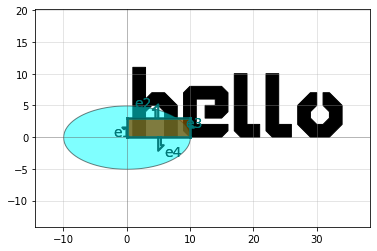

demo_movement: uid 0, ports [], aliases [], 0 polygons, 4 references

In [1]:
import gdsfactory as gf

# Start with a blank Component
c = gf.Component("demo_movement")

# Create some more shape Devices
T = gf.components.text("hello", size=10, layer=(1, 0))
E = gf.components.ellipse(radii=(10, 5), layer=(2, 0))
R = gf.components.rectangle(size=(10, 3), layer=(3, 0))

# Add the shapes to D as references
text = c << T
ellipse = c << E
rect1 = c << R
rect2 = c << R

c

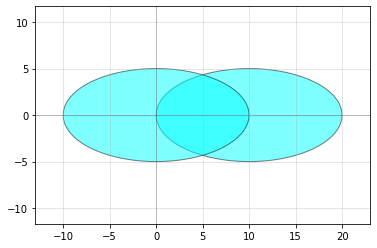

move_one_ellipse: uid 6, ports [], aliases [], 0 polygons, 2 references

In [2]:
c = gf.Component("move_one_ellipse")
e1 = c << gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e2 = c << gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e1.movex(10)
c

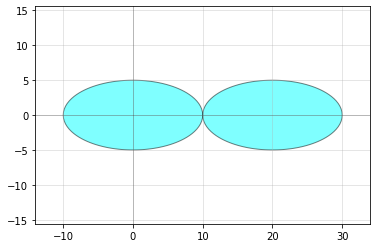

move_one_ellipse: uid 7, ports [], aliases [], 0 polygons, 2 references

In [3]:
c = gf.Component("move_one_ellipse")
e1 = c << gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e2 = c << gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e2.xmin = e1.xmax
c

Now let's practice moving and rotating the objects:

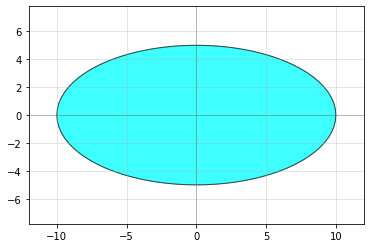

ellipse: uid 8, ports [], aliases [], 0 polygons, 2 references

In [4]:
c = gf.Component("ellipse")
E = gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e1 = c << E
e2 = c << E
c

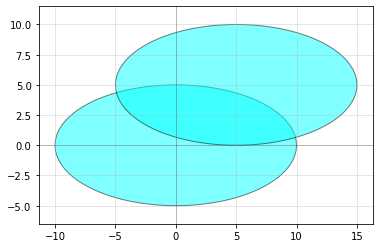

ellipse: uid 9, ports [], aliases [], 0 polygons, 2 references

In [5]:
c = gf.Component("ellipse")
e = gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e1 = c << e
e2 = c << e
e2.move(origin=[5, 5], destination=[10, 10])  # Translate by dx = 5, dy = 5
c

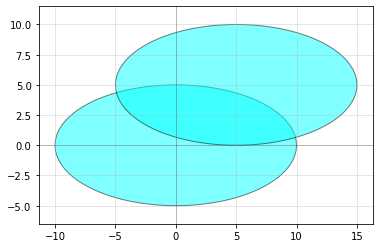

ellipse: uid 10, ports [], aliases [], 0 polygons, 2 references

In [6]:
c = gf.Component("ellipse")
e = gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e1 = c << e
e2 = c << e
e2.move([5, 5])  # Translate by dx = 5, dy = 5
c

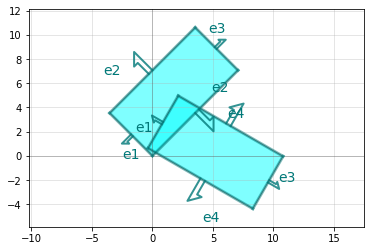

rectangles: uid 11, ports [], aliases [], 0 polygons, 2 references

In [7]:
c = gf.Component("rectangles")
r = gf.components.rectangle(size=(10, 5), layer=(2, 0))
rect1 = c << r
rect2 = c << r

rect1.rotate(45)  # Rotate the first straight by 45 degrees around (0,0)
rect2.rotate(
    -30, center=[1, 1]
)  # Rotate the second straight by -30 degrees around (1,1)
c

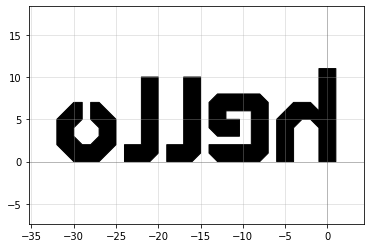

mirror: uid 14, ports [], aliases [], 0 polygons, 1 references

In [8]:
c = gf.Component("mirror")
text = c << gf.components.text("hello")

text.mirror(p1=[1, 1], p2=[1, 3])  # Reflects across the line formed by p1 and p2
c

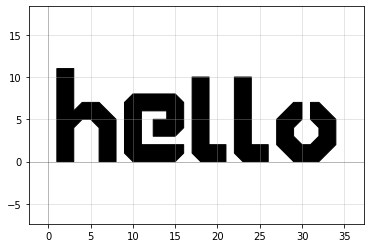

hello: uid 17, ports [], aliases [], 0 polygons, 1 references

In [9]:
c = gf.Component("hello")
text = c << gf.components.text("hello")
c

Each Component and ComponentReference object has several properties which can be
used
to learn information about the object (for instance where it's center coordinate
is).  Several of these properties can actually be used to move the geometry by
assigning them new values.

Available properties are:

- `xmin` / `xmax`: minimum and maximum x-values of all points within the object
- `ymin` / `ymax`: minimum and maximum y-values of all points within the object
- `x`: centerpoint between minimum and maximum x-values of all points within the
object
- `y`: centerpoint between minimum and maximum y-values of all points within the
object
- `bbox`: bounding box (see note below) in format ((xmin,ymin),(xmax,ymax))
- `center`: center of bounding box

In [10]:
print("bounding box:")
print(
    text.bbox
)  # Will print the bounding box of text in terms of [(xmin, ymin), (xmax, ymax)]
print("xsize and ysize:")
print(text.xsize)  # Will print the width of text in the x dimension
print(text.ysize)  # Will print the height of text in the y dimension
print("center:")
print(text.center)  # Gives you the center coordinate of its bounding box
print("xmax")
print(text.xmax)  # Gives you the rightmost (+x) edge of the text bounding box

bounding box:
[[ 1.  0.]
 [34. 11.]]
xsize and ysize:
33.0
11.0
center:
[17.5  5.5]
xmax
34.0


Let's use these properties to manipulate our shapes to arrange them a little
better

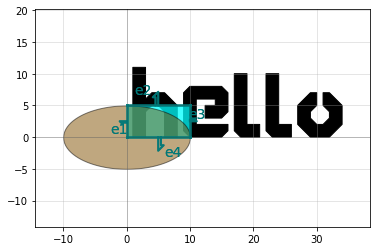

canvas: uid 18, ports [], aliases [], 0 polygons, 4 references

In [11]:
import gdsfactory as gf

c = gf.Component("canvas")
text = c << gf.components.text("hello")
E = gf.components.ellipse(radii=(10, 5), layer=(3, 0))
R = gf.components.rectangle(size=(10, 5), layer=(2, 0))
rect1 = c << R
rect2 = c << R
ellipse = c << E

c

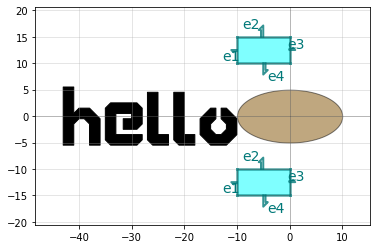

canvas: uid 18, ports [], aliases [], 0 polygons, 4 references

In [12]:
# First let's center the ellipse
ellipse.center = [
    0,
    0,
]  # Move the ellipse such that the bounding box center is at (0,0)

# Next, let's move the text to the left edge of the ellipse
text.y = (
    ellipse.y
)  # Move the text so that its y-center is equal to the y-center of the ellipse
text.xmax = ellipse.xmin  # Moves the ellipse so its xmax == the ellipse's xmin

# Align the right edge of the rectangles with the x=0 axis
rect1.xmax = 0
rect2.xmax = 0

# Move the rectangles above and below the ellipse
rect1.ymin = ellipse.ymax + 5
rect2.ymax = ellipse.ymin - 5

c

In addition to working with the properties of the references inside the
Component,
we can also manipulate the whole Component if we want.  Let's try mirroring the
whole Component `D`:

10.0


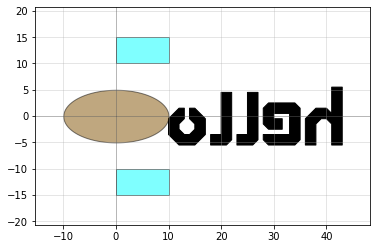

mirror_3615802e: uid 20, ports [], aliases [], 0 polygons, 1 references

In [13]:
print(c.xmax)  # Prints out '10.0'

c2 = c.mirror((0, 1))  # Mirror across line made by (0,0) and (0,1)
c2

A bounding box is the smallest enclosing box which contains all points of the geometry.

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1054: UserWarning: Component 'Unnamed_2ddb2c02' contains 1 Unnamed cells
  warnings.warn(


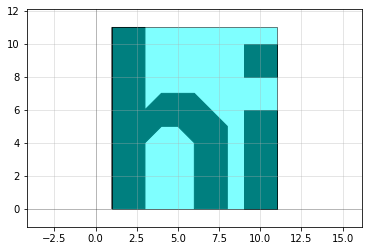

Unnamed_2ddb2c02: uid 21, ports [], aliases [], 0 polygons, 2 references

In [14]:
# The gf.components.library has a handy bounding-box function
# which takes a bounding box and returns the rectangle points for it
import gdsfactory as gf

c = gf.Component()
text = c << gf.components.text("hi")
bbox = text.bbox
c << gf.components.bbox(bbox=bbox, layer=(2, 0))
c

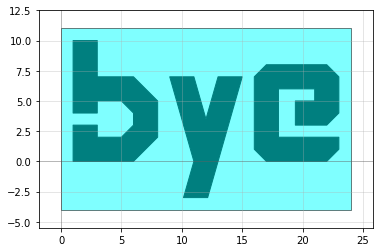

sample_padding: uid 25, ports [], aliases [], 1 polygons, 1 references

In [15]:
# gf.get_padding_points can also add a bbox with respect to the bounding box edges
c = gf.Component("sample_padding")
text = c << gf.components.text("bye")
device_bbox = text.bbox
c.add_polygon(gf.get_padding_points(text, default=1), layer=(2, 0))
c

When we query the properties of D, they will be calculated with respect to this
bounding-rectangle.  For instance:

In [16]:
print("Center of Component c:")
print(c.center)

print("X-max of Component c:")
print(c.xmax)

Center of Component c:
[12.   3.5]
X-max of Component c:
24.0


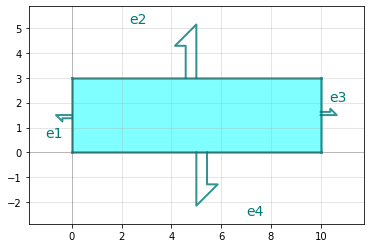

rect: uid 28, ports [], aliases [], 0 polygons, 1 references

In [17]:
D = gf.Component("rect")
R = gf.components.rectangle(size=(10, 3), layer=(2, 0))
rect1 = D << R
D

You can chain many of the movement/manipulation functions because they all return the object they manipulate.

For instance you can combine two expressions:

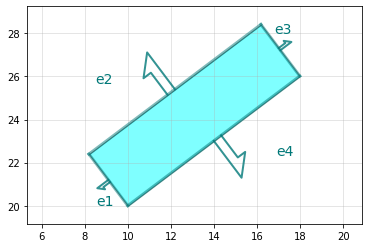

rect: uid 28, ports [], aliases [], 0 polygons, 1 references

In [18]:
rect1.rotate(angle=37)
rect1.move([10, 20])
D

...into this single-line expression

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1054: UserWarning: Component 'Unnamed_0472a9fe' contains 1 Unnamed cells
  warnings.warn(


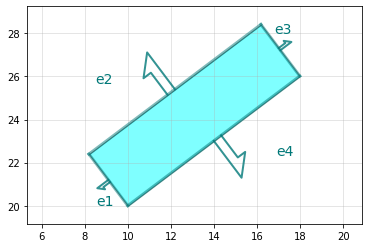

Unnamed_0472a9fe: uid 31, ports [], aliases [], 0 polygons, 1 references

In [19]:
D = gf.Component()
R = gf.components.rectangle(size=(10, 3), layer=(2, 0))
rect1 = D << R
rect1.rotate(angle=37).move([10, 20])
D